In [1]:
import json
# import pandas as pd
import numpy as np

In [2]:
lengths = []
with open("../data/yelp_academic_dataset_review.json") as f:
    for line in f:
        lengths.append(len(json.loads(line)["text"]))

lengths = np.array(lengths)

In [3]:
len(lengths)

6990280

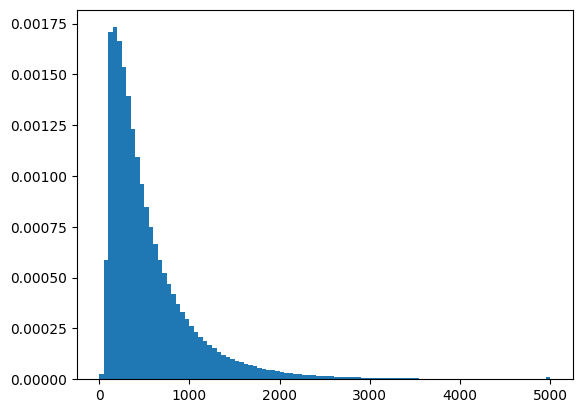

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
_ = plt.hist(lengths, bins=100, density=True)
fig.savefig("images/02.review.length.pdf", format="pdf")

In [5]:
# calculate the mean and standard deviation

mean = np.mean(lengths)
std = np.std(lengths)

print("mean: ", mean)
print("std: ", std)

mean:  567.7644364746477
std:  527.2577708112616


In [14]:
# sample_nd = np.random.normal(mean, std, len(lengths))
# _ = plt.hist(sample_nd, bins=100, density=True)

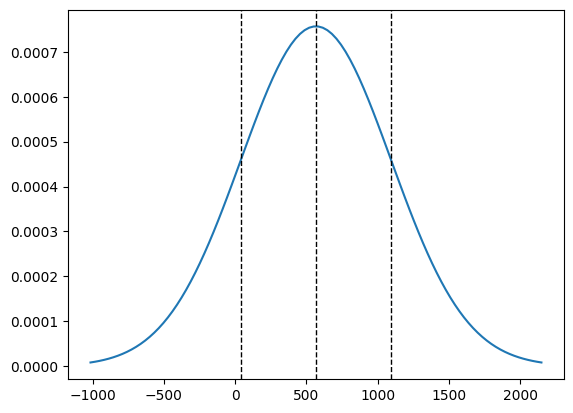

In [6]:
# plot the normal distribution
# 99.7% of the data falls within 3 standard deviations of the mean -> multiply std by 3

import scipy.stats as stats

def calculate_phi(x, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)

x = np.linspace(mean - 3 * std, mean + 3 * std , 100)
plot2 = plt.plot(x, calculate_phi(x, mean, std))
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1) # type: ignore
plt.axvline(mean + std, color='k', linestyle='dashed', linewidth=1) # type: ignore
plt.axvline(mean - std, color='k', linestyle='dashed', linewidth=1) # type: ignore

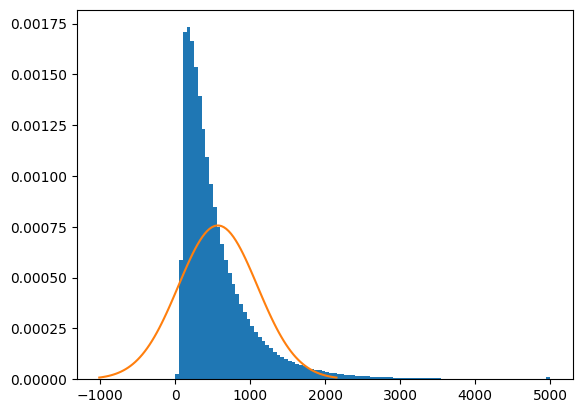

In [7]:

fig, ax = plt.subplots(1, 1)
ax.hist(lengths, bins=100, density=True, label="data")
ax.plot(x, stats.norm.pdf(x, mean, std), label="normal distribution")

In [8]:
fig.savefig("images/02.review.length.estimated.pdf", format="pdf")